<a href="https://colab.research.google.com/github/Aditya148/Aditya148/blob/main/Tensorflow_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
df = pd.read_csv('/content/wine-reviews.csv', usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])

In [3]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [4]:
df.dropna(subset=['description', 'points'], inplace=True)

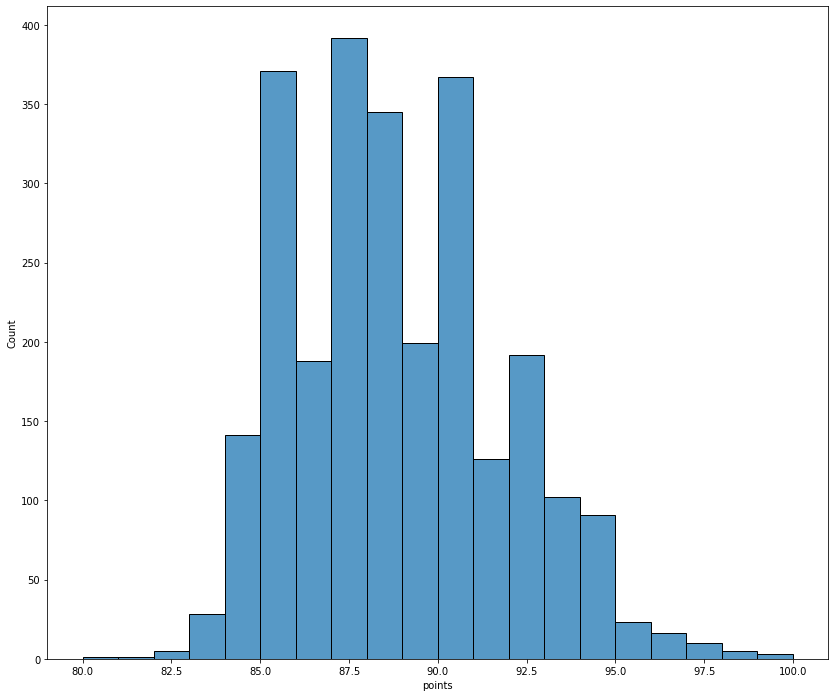

In [5]:
plt.figure(figsize=(14,12))
sns.histplot(df['points'], bins=20)

In [6]:
df = pd.read_csv('/content/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


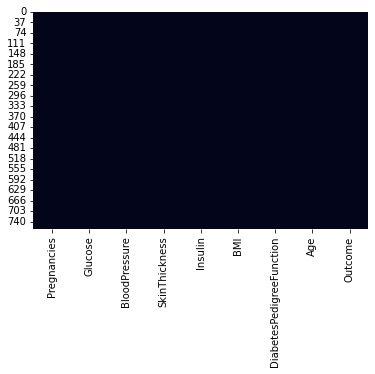

In [9]:
sns.heatmap(df.isnull(), cbar=False)

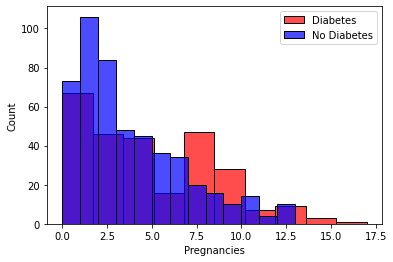

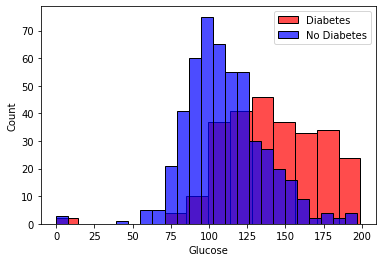

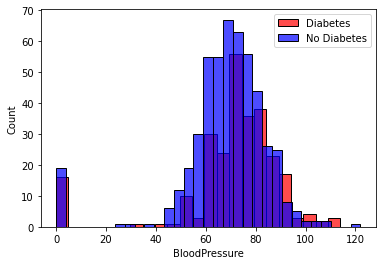

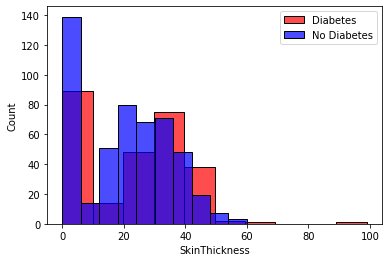

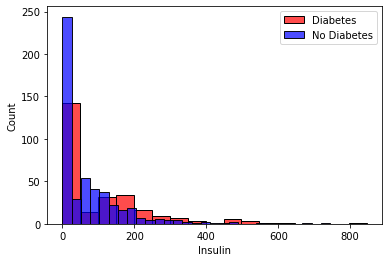

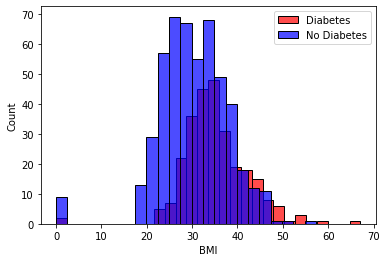

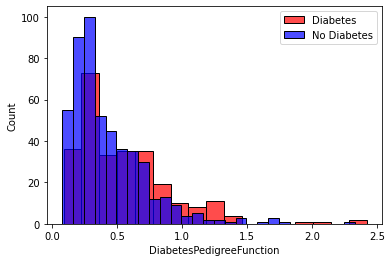

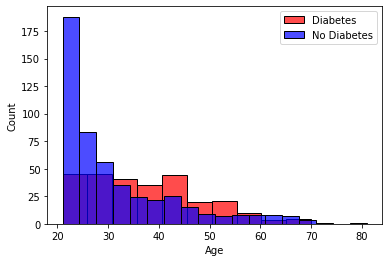

In [10]:
for i in range(len(df.columns[:-1])):
  lable = df.columns[i]
  sns.histplot(df[df['Outcome'] == 1][lable], color='red', label='Diabetes', alpha=0.7)
  sns.histplot(df[df['Outcome'] == 0][lable], color='blue', label='No Diabetes', alpha=0.7)
  plt.legend()
  plt.show()

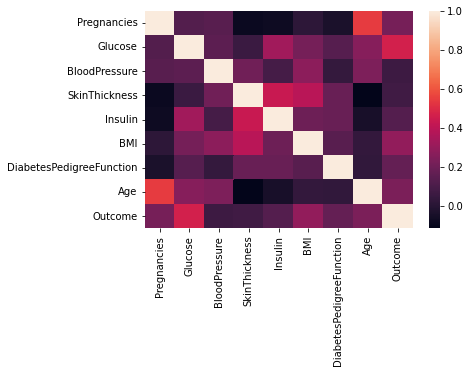

In [11]:
sns.heatmap(df.corr())

In [12]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
x = sc.fit_transform(x)

In [17]:
transformed_df = pd.DataFrame(x, columns = df.columns[:-1])

In [18]:
transformed_df['Outcome'] = y

In [19]:
transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


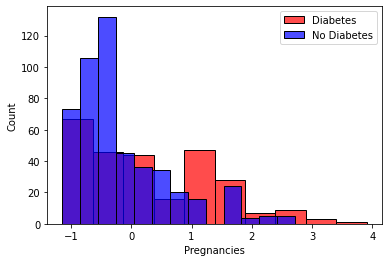

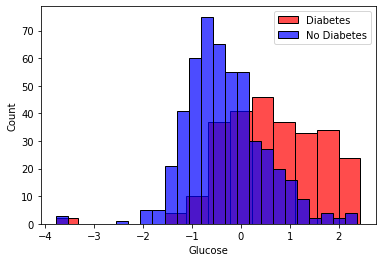

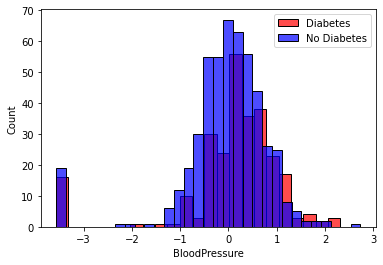

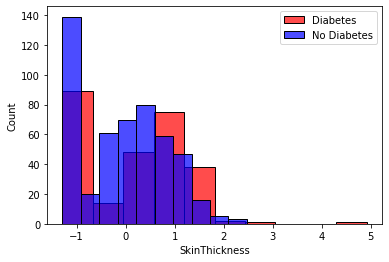

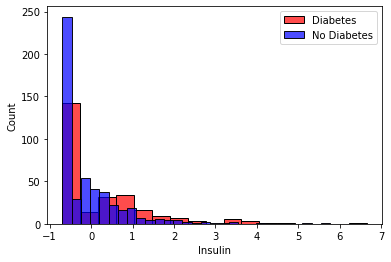

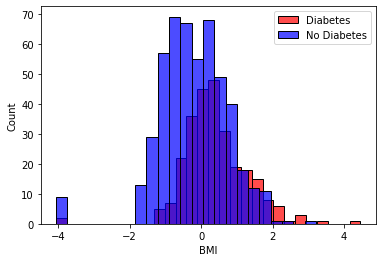

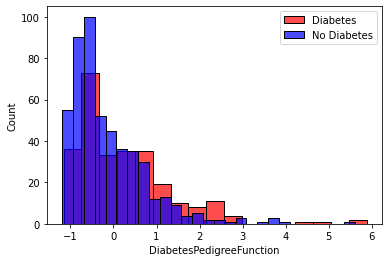

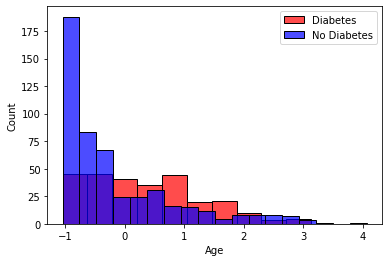

In [20]:
for i in range(len(transformed_df.columns[:-1])):
  lable = df.columns[i]
  sns.histplot(transformed_df[transformed_df['Outcome'] == 1][lable], color='red', label='Diabetes', alpha=0.7)
  sns.histplot(transformed_df[transformed_df['Outcome'] == 0][lable], color='blue', label='No Diabetes', alpha=0.7)
  plt.legend()
  plt.show()

In [21]:
transformed_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
# !pip install -U imbalanced_learn

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

In [26]:
transformed_df = pd.DataFrame(x, columns = df.columns[:-1])
transformed_df['Outcome'] = y

In [27]:
transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [28]:
transformed_df['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [31]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(16, activation='LeakyReLU'),
                             tf.keras.layers.Dense(16, activation='LeakyReLU'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics='accuracy')

In [33]:
model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
38/38 [==============================] - 1s 8ms/step - loss: 0.6867 - accuracy: 0.5383 - val_loss: 0.6533 - val_accuracy: 0.5900
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6191 - accuracy: 0.6950 - val_loss: 0.6137 - val_accuracy: 0.6950
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.7283 - val_loss: 0.5815 - val_accuracy: 0.7050
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7233 - val_loss: 0.5515 - val_accuracy: 0.7000
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7367 - val_loss: 0.5234 - val_accuracy: 0.7150
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7450 - val_loss: 0.5031 - val_accuracy: 0.7200
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7550 - val_loss: 0.4879 - val_accuracy: 0.7500
Epoch 8/50
38/38 [==

In [34]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.7600


[0.5408985018730164, 0.7599999904632568]

# RNNs

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

In [39]:
df = pd.read_csv('/content/wine-reviews.csv', usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])

In [40]:
df.dropna(subset=['description', 'points'], inplace=True)

In [41]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [44]:
plt.figure(figsize=(14,12))
sns.histplot(df['points'], bins=20)

KeyError: ignored

<Figure size 1008x864 with 0 Axes>

In [43]:
df['label'] = (df.points<=90).astype(int)
df = df[['description', 'label']]

In [47]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [49]:
len(df), len(train), len(val), len(test)

(2606, 2084, 261, 261)

In [51]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1023):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df['description']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [52]:
train_data = df_to_dataset(train)
val_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [53]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [55]:
list(train_data)[0]

(<tf.Tensor: shape=(1023,), dtype=string, numpy=
 array([b"You'd swear this 100% varietal wine had some Viognier in it, but the orange-peel aromas and flavors are just a hallmark of Yakima Valley fruit. It also features abundant cranberry, mulberry, rose hip and savory notes. The supple feel with light meat accents is where this wine really shines, showing purity, texture and a lot of elegance. Those looking for big fruit, look elsewhere.",
        b'This wine is abundant with aromas of cherry Coke, sarsaparilla and baking spice. The palate is delicate yet is given some weight from seven months in neutral French and American oak. This wine gains a soft texture from Tannat skins added during fermentation.',
        b'The blend is roughly two-thirds Shiraz and one-third Cabernet, and the result combines berries with cassis and generosity with structure, all framed by toasty oak. Savory in character, long and dusty on the finish. Drink now-2018.',
        ...,
        b"This wine contains

In [57]:
#tensorflow_hub is a repository of trained ML Models

In [58]:
embedding = 'https://tfhub.dev/google/nnlm-en-dim50/2'
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [60]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1023, 50), dtype=float32, numpy=
array([[ 0.2182316 , -0.33283737, -0.12383932, ...,  0.22546239,
        -0.25242338,  0.24045914],
       [ 0.13534315, -0.11182248,  0.14514667, ...,  0.0490283 ,
         0.08214708,  0.2373126 ],
       [ 0.45807138, -0.29506874,  0.0638743 , ..., -0.09291589,
        -0.20549083, -0.02069994],
       ...,
       [ 0.36305234, -0.23788728,  0.1213913 , ..., -0.05323395,
         0.0442667 ,  0.02904623],
       [ 0.21128882, -0.13584302, -0.10939334, ...,  0.05813253,
        -0.10435598,  0.00231667],
       [ 0.33997092, -0.34688136, -0.09496993, ..., -0.07811635,
         0.06731477,  0.07676301]], dtype=float32)>

In [70]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [71]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics='accuracy')

In [72]:
model.evaluate(train_data)

3/3 [==============================] - 1s 72ms/step - loss: 0.7265 - accuracy: 0.3033


[0.7264743447303772, 0.30326294898986816]

In [73]:
model.evaluate(val_data)

1/1 [==============================] - 0s 83ms/step - loss: 0.7363 - accuracy: 0.2644


[0.7363234758377075, 0.26436781883239746]

In [74]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
3/3 [==============================] - 3s 675ms/step - loss: 0.7221 - accuracy: 0.4088 - val_loss: 0.6918 - val_accuracy: 0.5326
Epoch 2/10
3/3 [==============================] - 2s 581ms/step - loss: 0.6865 - accuracy: 0.5360 - val_loss: 0.6576 - val_accuracy: 0.7318
Epoch 3/10
3/3 [==============================] - 2s 580ms/step - loss: 0.6500 - accuracy: 0.6560 - val_loss: 0.6284 - val_accuracy: 0.7854
Epoch 4/10
3/3 [==============================] - 2s 586ms/step - loss: 0.6261 - accuracy: 0.7116 - val_loss: 0.6020 - val_accuracy: 0.7854
Epoch 5/10
3/3 [==============================] - 2s 587ms/step - loss: 0.5983 - accuracy: 0.7414 - val_loss: 0.5779 - val_accuracy: 0.7854
Epoch 6/10
3/3 [==============================] - 2s 599ms/step - loss: 0.5762 - accuracy: 0.7596 - val_loss: 0.5578 - val_accuracy: 0.7854
Epoch 7/10
3/3 [==============================] - 2s 576ms/step - loss: 0.5617 - accuracy: 0.7692 - val_loss: 0.5423 - val_accuracy: 0.7854
Epoch 8/10
3/3 [====

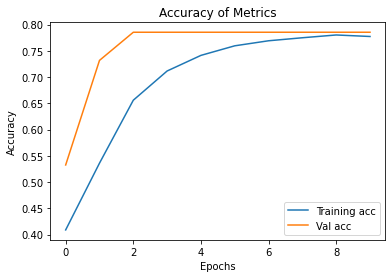

In [75]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy of Metrics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

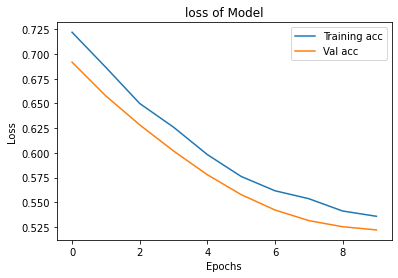

In [76]:
plt.plot(history.history['loss'], label='Training acc')
plt.plot(history.history['val_loss'], label='Val acc')
plt.title('loss of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
model.evaluate(test_data)

1/1 [==============================] - 0s 133ms/step - loss: 0.5295 - accuracy: 0.7778


[0.5294587016105652, 0.7777777910232544]

# LSTM

In [79]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [80]:
vocab = np.array(encoder.get_vocabulary())

In [81]:
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'of', 'a', 'with', 'this', 'is', 'wine',
       'in', 'flavors', 'it', 'to', 'fruit', 'its', 'on', 'aromas',
       'palate', 'acidity'], dtype='<U17')

In [86]:
model = tf.keras.Sequential([
                             encoder,
                             tf.keras.layers.Embedding(
                                 input_dim=len(encoder.get_vocabulary()),
                                 output_dim=32,
                                 mask_zero=True
                             ),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics='accuracy')

In [88]:
model.evaluate(train_data)

3/3 [==============================] - 7s 101ms/step - loss: 0.6909 - accuracy: 0.7452


[0.6909262537956238, 0.7452015280723572]

In [89]:
model.evaluate(test_data)

1/1 [==============================] - 0s 131ms/step - loss: 0.6909 - accuracy: 0.7241


[0.6908664107322693, 0.7241379022598267]

In [90]:
history = model.fit(train_data, epochs=5, validation_data=val_data)

Epoch 1/5
3/3 [==============================] - 11s 564ms/step - loss: 0.6892 - accuracy: 0.7222 - val_loss: 0.6798 - val_accuracy: 0.7854
Epoch 2/5
3/3 [==============================] - 2s 432ms/step - loss: 0.6772 - accuracy: 0.7821 - val_loss: 0.6649 - val_accuracy: 0.7854
Epoch 3/5
3/3 [==============================] - 2s 414ms/step - loss: 0.6617 - accuracy: 0.7821 - val_loss: 0.6461 - val_accuracy: 0.7854
Epoch 4/5
3/3 [==============================] - 2s 485ms/step - loss: 0.6405 - accuracy: 0.7821 - val_loss: 0.6213 - val_accuracy: 0.7854
Epoch 5/5
3/3 [==============================] - 2s 411ms/step - loss: 0.6146 - accuracy: 0.7821 - val_loss: 0.5882 - val_accuracy: 0.7854


In [91]:
model.evaluate(test_data)

1/1 [==============================] - 0s 118ms/step - loss: 0.5889 - accuracy: 0.7778


[0.5889397859573364, 0.7777777910232544]